### CSC2611 Lab: Word embedding and semantic change

Explore the word embedding modelword2vec and extend the analyses in the earlier exercise to both synchronic and diachronic settings

### Q2.  Using gensim, extract embeddings of words in Table 1 of RG65 that also appeared inthe set W from the earlier exercise, i.e., the pairs of words should be identical in all analyses. 

Using all words that are present in RG65, since we constructed W in the exercise to include all of them

In [1]:
import gensim
from gensim.models import KeyedVectors

from collections import defaultdict
import numpy as np


In [2]:
%load_ext blackcellmagic

In [3]:
rg_words_first = [
    "cord",
    "hill",
    "rooster",
    "car",
    "noon",
    "cemetery",
    "fruit",
    "glass",
    "autograph",
    "magician",
    "automobile",
    "crane",
    "mound",
    "brother",
    "grin",
    "sage",
    "asylum",
    "oracle",
    "asylum",
    "bird",
    "graveyard",
    "bird",
    "glass",
    "food",
    "boy",
    "brother",
    "cushion",
    "asylum",
    "monk",
    "furnace",
    "asylum",
    "magician",
    "coast",
    "hill",
    "grin",
    "cord",
    "shore",
    "glass",
    "monk",
    "grin",
    "boy",
    "serf",
    "automobile",
    "journey",
    "mound",
    "autograph",
    "lad",
    "coast",
    "forest",
    "forest",
    "food",
    "implement",
    "cemetery",
    "cock",
    "shore",
    "boy",
    "bird",
    "cushion",
    "coast",
    "cemetery",
    "furnace",
    "automobile",
    "crane",
    "midday",
    "gem",
]
rg_words_second = [
    "smile",
    "woodland",
    "voyage",
    "journey",
    "string",
    "mound",
    "furnace",
    "jewel",
    "shore",
    "oracle",
    "wizard",
    "implement",
    "stove",
    "lad",
    "implement",
    "wizard",
    "fruit",
    "sage",
    "monk",
    "crane",
    "madhouse",
    "cock",
    "magician",
    "fruit",
    "rooster",
    "monk",
    "jewel",
    "madhouse",
    "slave",
    "stove",
    "cemetery",
    "wizard",
    "forest",
    "mound",
    "lad",
    "string",
    "woodland",
    "tumbler",
    "oracle",
    "smile",
    "sage",
    "slave",
    "cushion",
    "voyage",
    "shore",
    "signature",
    "wizard",
    "shore",
    "graveyard",
    "woodland",
    "rooster",
    "tool",
    "woodland",
    "rooster",
    "voyage",
    "lad",
    "woodland",
    "pillow",
    "hill",
    "graveyard",
    "implement",
    "car",
    "rooster",
    "noon",
    "jewel",
]
sim_scores = [
    0.02,
    1.48,
    0.04,
    1.55,
    0.04,
    1.69,
    0.05,
    1.78,
    0.06,
    1.82,
    0.11,
    2.37,
    0.14,
    2.41,
    0.18,
    2.46,
    0.19,
    2.61,
    0.39,
    2.63,
    0.42,
    2.63,
    0.44,
    2.69,
    0.44,
    2.74,
    0.45,
    3.04,
    0.57,
    3.11,
    0.79,
    3.21,
    0.85,
    3.29,
    0.88,
    3.41,
    0.9,
    3.45,
    0.91,
    3.46,
    0.96,
    3.46,
    0.97,
    3.58,
    0.97,
    3.59,
    0.99,
    3.6,
    1.0,
    3.65,
    1.09,
    3.66,
    1.18,
    3.68,
    1.22,
    3.82,
    1.24,
    3.84,
    1.26,
    3.88,
    1.37,
    3.92,
    1.41,
    3.94,
    3.94,
]



In [4]:
# loading the word2vec model
# NOTE: this step takes time
model = KeyedVectors.load_word2vec_format(
    "data/GoogleNews-vectors-negative300.bin", binary=True
)

In [5]:
# denoting word pairs with P
P = []
S = []
for (first_word, second_word, sim) in zip(rg_words_first,rg_words_second,sim_scores):
    P.extend([[first_word, second_word]])
    S.append(sim)


# # checking that numbers match with what we expect in W, for comparability
# assert len(list(set(P)))==65

In [6]:
def get_embedding(word, model):
    """Returns word embedding for word.
    If googlenews model is used, 300-dim vector is 
        returned.
    
    """
    return model.get_vector(word)

In [7]:
# testing function
assert get_embedding('dog',model).shape==(300,)

### Q3: Calculate cosine distance between each pair of word embeddings you have extracted,and report the Pearson correlation between word2vec-based and human similarities.  

TODO in report: Report value, comment on this value in comparison to those from LSA and word-context vectors from analyses in the earlier exercise

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr, spearmanr

In [9]:
embed_sim = []

for p, s in zip(P, S):
    sim = cosine_similarity(
        get_embedding(p[0], model).reshape(1, -1),
        get_embedding(p[1], model).reshape(1, -1),
    )[0][0]
    embed_sim.append(sim)

In [10]:
# computing pearson corr
stats, p = pearsonr(embed_sim, S)
print("Pearson corr: {}, with p-value {}".format(stats, p))

Pearson corr: 0.7720616125197682, with p-value 5.091065805872837e-14


### Q4.  Perform the analogy test based on data with the pre-trainedword2vec embeddings.  Report the accuracy on the semantic analogy test and the syntactic analogy test

In [11]:
# getting the data from the text file containing analogies
txt_file = open("data/analogy_txt.txt", "r")

# skipping first line because it says:
# '// Copyright 2013 Google Inc. All Rights Reserved.'
# The file consists of two types of lines:
# starting with ":", which indicates that a new
# analogy type begins in the next line
# analogy:  4 words involved in an analogy
all_analogies = txt_file.read().split("\n")[1:-1]

In [12]:
# getting the analogy data for train/test
category_data = {}
for line in all_analogies:
    if line[0] == ":":
        cat = line[1:]
        if cat not in category_data.keys():
            category_data[cat] = []
    else:
        pair1_word1, pair1_word2, pair2_word1, pair2_word2 = line.split(" ")
        category_data[cat].append(
            [(pair1_word1, pair1_word2), (pair2_word1, pair2_word2)]
        )

In [13]:
# mapping category types to semantic or syntactic
test_type = {}
for cat in category_data.keys():
    if "gram" in cat:
        test_type[cat] = "syntactic"
    else:
        test_type[cat] = "semantic"

LSA was run on the same data set in the exercise, so retrieving it

In [14]:
import pickle

In [15]:
# mapping from word to ID
pkl_file = open("data/lsa_vocab_to_id.pkl", "rb")
lsa_vocab_to_id = pickle.load(pkl_file)

# word vectors
pkl_file = open("data/lsa_300.pkl", "rb")
lsa_word_vec = pickle.load(pkl_file)

kv = KeyedVectors(300)
kv.add(list(lsa_vocab_to_id.keys()), lsa_word_vec)
kv.save("data/lsa_300.kvmodel")

# creating a model out of this, so that we can use functions
# like "most_similar()"
# Reference:
# https://stackoverflow.com/questions/how-to-save-as-a-gensim-word2vec-file
lsa_model = KeyedVectors.load("data/lsa_300.kvmodel")

#### Conducting the analogy test

In [16]:
def analogy(model, first_word, second_word, third_word):
    """Function to conduct analogy.
    Given analogy first_word:second_word, we want to
        find third_word:?
    
    """
    result = model.most_similar(
        negative=[first_word], positive=[second_word, third_word]
    )
    return result[0][0]

In [17]:
perf_dict = {}
perf_dict['word2vec'] = {}
perf_dict['lsa'] = {}

# getting overall dicts
perf_dict['word2vec']["semantic"] = []
perf_dict['word2vec']["syntactic"] = []


perf_dict['lsa']["semantic"] = []
perf_dict['lsa']["syntactic"] = []


for key, analogy_pairs in category_data.items():

    curr_test_type = test_type[key]

    for word_pair in analogy_pairs:
        first_word, second_word = word_pair[0]
        third_word, fourth_word = word_pair[1]

        if (
            (first_word in lsa_vocab_to_id.keys())
            and (second_word in lsa_vocab_to_id.keys())
            and (third_word in lsa_vocab_to_id.keys())
            and (fourth_word in lsa_vocab_to_id.keys())
        ):
            
            # Synchronic Googlenews
            pred = analogy(model, first_word, second_word, third_word)
            perf_dict['word2vec'][curr_test_type].append(int(pred == fourth_word))

            # Synchronic LSA
            pred = analogy(lsa_model, first_word, second_word, third_word)
            perf_dict['lsa'][curr_test_type].append(int(pred == fourth_word))

In [18]:
for method in ['word2vec','lsa']:
    curr_perf_dict = perf_dict[method]
    num_samples = 0
    correct_classif = 0
    for test_type, acc in curr_perf_dict.items():
        num_samples += len(acc)
        correct_classif += np.sum(acc)
        print(
            "For test_type: {}, number of test samples {}, "
            "correct: {}, accuracy: {}".format(
                test_type, len(acc), np.sum(acc), np.sum(acc) / len(acc)
            )
        )

    acc_overall = correct_classif / num_samples
    print("For method {}, sample size: {}, correct: {}, accuracy: {}".format(
                                                                             method,
                                                                             num_samples, 
                                                                             correct_classif, 
                                                                             acc_overall))

For test_type: semantic, number of test samples 90, correct: 81, accuracy: 0.9
For test_type: syntactic, number of test samples 1992, correct: 1346, accuracy: 0.6757028112449799
For method word2vec, sample size: 2082, correct: 1427, accuracy: 0.6853986551392891
For test_type: semantic, number of test samples 90, correct: 15, accuracy: 0.16666666666666666
For test_type: syntactic, number of test samples 1992, correct: 194, accuracy: 0.09738955823293173
For method lsa, sample size: 2082, correct: 209, accuracy: 0.10038424591738712


## 2. Diachronic word embedding

This file consists of word embeddings for 2000 words over decades 1900-1990

In [19]:
with open("embeddings/data.pkl", "rb") as embed_file:
    diachronic_embeddings = pickle.load(embed_file)

### Q2. Propose three different methods for measuring degree of semantic change for individual  words  and  report  the  top  20  most  and  least  changing  words  in  table(s)  from  each measure.  

Measure the intercorrelations (of semantic change in all words, given the embed-dings from Step 1) among the three methods you have proposed and summarize the Pearson correlations in a 3-by-3 table

In [20]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

### Method 1: Assuming that we only want to measure semantic change from initial to final point, i.e., assume that a word undergoes at max ONE sizable change in the timepoints considered

Definition of degree of semantic change considered: maximum drift away from initial meaning in 1900

Then semantic change can be measured as cosine distance between embedding in decade 1900, and then in 1990 decade

In [21]:
cosine_sims = []
for i, word in enumerate(diachronic_embeddings["w"]):
    initial_embed = diachronic_embeddings["E"][i][0]
    final_embed = diachronic_embeddings["E"][i][-1]
    if np.sum(initial_embed) == 0:
        print("Word created {}".format(word))
    cosine_sims.append(
        1
        - cosine_similarity(initial_embed.reshape(1, -1), final_embed.reshape(1, -1))[
            0
        ][0]
    )

Word created techniques
Word created skills
Word created mcgraw
Word created ml


In [22]:
cosine_sims = np.array(cosine_sims)
print(
    "Highest changing: ",
    np.array(diachronic_embeddings["w"])[np.argsort(cosine_sims)[-24:]],
)
print(
    "Least changing: ",
    np.array(diachronic_embeddings["w"])[np.argsort(cosine_sims)[:20]],
)

Highest changing:  ['therapy' 'challenge' 'stanford' 'assessment' 'film' 'shift' 'berkeley'
 'patterns' 'perspective' 'impact' 'media' 'shri' 'van' 'approach' 'goals'
 'sector' 'radio' 'computer' 'objectives' 'programs' 'techniques' 'ml'
 'skills' 'mcgraw']
Least changing:  ['april' 'june' 'november' 'february' 'years' 'october' 'increase'
 'january' 'century' 'months' 'daughter' 'december' 'god' 'september'
 'feet' 'week' 'evening' 'door' 'payment' 'miles']


### Method 2: 

Definition of degree of semantic change considered: maximum number of fluctuations in meaning


In [23]:
summary_stats = []
for i, word in enumerate(diachronic_embeddings["w"]):
    curr_word = []
    for time in range(9):
        for consecutive_time in range(time + 1, 10):
            initial_embed = diachronic_embeddings["E"][i][time]
            final_embed = diachronic_embeddings["E"][i][consecutive_time]
            #             if np.sum(initial_embed)==0:
            #                 print('Word created {} after time {}'.format(word, time))
            curr_word.append(
                1
                - cosine_similarity(
                    initial_embed.reshape(1, -1), final_embed.reshape(1, -1)
                )[0][0]
            )
    summary_stats.append(curr_word)

In [24]:
max_vars = []
for i in summary_stats:
    max_vars.append(np.max(i))

var_vars = []
for i in summary_stats:
    var_vars.append(np.std(i))

In [27]:
max_vars = np.array(max_vars)

print(
    "Highest changing: ",
    np.array(diachronic_embeddings["w"])[np.argsort(max_vars)[-20:]],
)
print(
    "Least changing: ", np.array(diachronic_embeddings["w"])[np.argsort(max_vars)[:20]]
)

Highest changing:  ['princeton' 'berkeley' 'assessment' 'patterns' 'media' 'van' 'approach'
 'impact' 'perspective' 'goals' 'radio' 'sector' 'programs' 'objectives'
 'techniques' 'shri' 'computer' 'mcgraw' 'ml' 'skills']
Least changing:  ['april' 'november' 'february' 'october' 'january' 'june' 'december'
 'september' 'century' 'daughter' 'evening' 'july' 'husband' 'coast'
 'trees' 'river' 'church' 'increase' 'god' 'miles']


In [28]:
var_vars = np.array(var_vars)

print(
    "Highest changing: ",
    np.array(diachronic_embeddings["w"])[np.argsort(var_vars)[-20:]],
)
print(
    "Least changing: ", np.array(diachronic_embeddings["w"])[np.argsort(var_vars)[:20]]
)

Highest changing:  ['therapy' 'perspective' 'media' 'levels' 'input' 'assessment' 'approach'
 'patterns' 'impact' 'sector' 'radio' 'goals' 'programs' 'mcgraw' 'shri'
 'computer' 'objectives' 'ml' 'skills' 'techniques']
Least changing:  ['april' 'husband' 'november' 'god' 'february' 'number' 'january'
 'october' 'daughter' 'wife' 'century' 'increase' 'church' 'june' 'words'
 'december' 'amount' 'poet' 'coast' 'years']


### Method 3: 

This can be computed as the Spearman correlation between the cosine distance between consecutive time points, and the time scale 


In [29]:
change_time = []
for i, word in enumerate(diachronic_embeddings["w"]):
    curr_word = []
    for time in range(9):
        consecutive_time = time + 1
        initial_embed = diachronic_embeddings["E"][i][time]
        final_embed = diachronic_embeddings["E"][i][consecutive_time]
        curr_word.append(
            cosine_similarity(initial_embed.reshape(1, -1), final_embed.reshape(1, -1))[
                0
            ][0]
        )
    change_time.append(spearmanr(curr_word, range(9))[0])

In [30]:
change_time = np.array(change_time)

print(
    "Highest changing: ",
    np.array(diachronic_embeddings["w"])[np.argsort(change_time)[-20:]],
)
print(
    "Least changing: ",
    np.array(diachronic_embeddings["w"])[np.argsort(change_time)[:20]],
)

Highest changing:  ['joseph' 'anything' 'decades' 'input' 'institutions' 'patterns' 'census'
 'agencies' 'computer' 'impact' 'concern' 'perspective' 'technique'
 'goals' 'c' 'procedures' 'levels' 'technology' 'media' 'sector']
Least changing:  ['group' 'knees' 'object' 'pages' 'pressure' 'priest' 'citizen' 'tube'
 'tea' 'sodium' 'enterprise' 'treaty' 'grand' 'formula' 'operations'
 'path' 'journey' 'boat' 'tail' 'heart']


In [31]:
print("Pearson correlation between method 1 and 2: ", pearsonr(max_vars, cosine_sims))
print("Pearson correlation between method 2 and 3: ", pearsonr(change_time, max_vars))
print(
    "Pearson correlation between method 3 and 1: ", pearsonr(cosine_sims, change_time)
)

Pearson correlation between method 1 and 2:  (0.976195339168775, 0.0)
Pearson correlation between method 2 and 3:  (0.23875975695927285, 2.5376091945812523e-27)
Pearson correlation between method 3 and 1:  (0.22758828458845598, 6.534850834424029e-25)


### Q3: Propose and justify a procedure for evaluating the accuracy of the methods you have proposed in Step 2, and then evaluate the three methods following this proposed procedure

Two metrics:

1) Detecting known shifts: of all the words used in Hamilton et al., 2016, only the word "record" is in the dictionary

2) Discovering new shifts: using the distributional hypothesis assumption

    Use the distributional hypothesis: if a word undergoes semantic change, its context changes. As a result, the nearest-neighbors change as well

    Thus, cosine similarity for a word in two time points can be measured as the intersection between its k-nearest neighbors at both points divided by k. Where k-nearest neighbors are identified by cosine similarity.

    We will only consider initial timepoint and final timepoint, i.e., assuming it undergoes one major change. 
    k=5 is chosen, but a smaller/larger value can be chosen based on some validation performance (i.e., if a labelled set was available)

#### Eval 1: Detecting known shifts

In [32]:
word_in_list = "record"

In [33]:
def compute_nearest_neighbors(word_index, embeddings, time, k=20):
    """Compute nearest cosine-neighbors for word indicated by
        index in embedding matrix.
    
    embeddings: Vocab size x number_of_decade x embed_dim, i.e., for a given decade/time.
    """

    word_embed = embeddings[word_index][time]
    distance_arr = []
    for i, embed in enumerate(embeddings):
        if i != word_index:
            distance_arr.append(
                (
                    1
                    - cosine_similarity(
                        embed[time].reshape(1, -1), word_embed.reshape(1, -1)
                    )
                )[0][0]
            )
        else:
            distance_arr.append(np.inf)
    return np.argsort(distance_arr)[:k]

In [34]:
intersection_dist = []

# number of neighbors to conside
k = 5

for i,word in enumerate(diachronic_embeddings['w']):
    init_neighbors = compute_nearest_neighbors(i,diachronic_embeddings['E'],0,k)
    final_neighbors = compute_nearest_neighbors(i,diachronic_embeddings['E'],-1,k)
    intersection_metric = len(set(init_neighbors).intersection(final_neighbors))/k
    intersection_dist.append(1-intersection_metric)
    


#### 2b. Computing correlation between all distance measures and our measure of correctness

In [35]:
print(
    "Pearson correlation between method 1 and distribution-hyp: ",
    pearsonr(intersection_dist, cosine_sims),
)
print(
    "Pearson correlation between method 2 and distribution-hyp: ",
    pearsonr(intersection_dist, max_vars),
)
print(
    "Pearson correlation between method 3 and distribution-hyp: ",
    pearsonr(intersection_dist, change_time),
)

Pearson correlation between method 1 and distribution-hyp:  (0.3830471245029616, 6.6828823905378225e-71)
Pearson correlation between method 2 and distribution-hyp:  (0.3822050682433136, 1.423759832869825e-70)
Pearson correlation between method 3 and distribution-hyp:  (0.07979178248192736, 0.00035445190402636764)


### Q4. Extract the top 3 changing words using the best method from Steps 2 and 3.  Propose and implement a simple way of detecting the point

The 1st method, i.e., computing cosine distance between the first and last embedding across the decases is used to measure the degress of semantic change performs the best, based on correlations with our evaluation strategy.

So, to compute the "changepoint", we can:

1) Look at cosine-distance between consecutive time points

2) Use the mean-shift algorithm to find statistically significant change

In [36]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

In [81]:
# words identified as having highest change as per method 1 are : 'ml','skills','mcgraw'

change_words = ["objectives", "programs", "computer","ml", "skills", "mcgraw"]
word_indices = []
sequential_cos = []
for word in change_words:
    word_ind = diachronic_embeddings["w"].index(word)
    curr_word = []
    for time in range(10)[1:]:
        consecutive_time = time -1
        initial_embed = diachronic_embeddings["E"][word_ind][time]
        final_embed = diachronic_embeddings["E"][word_ind][consecutive_time]
        curr_word.append(
            cosine_similarity(initial_embed.reshape(1, -1), final_embed.reshape(1, -1))[
                0
            ][0]
        )
    sequential_cos.append(curr_word)
    word_indices.append(word_ind)

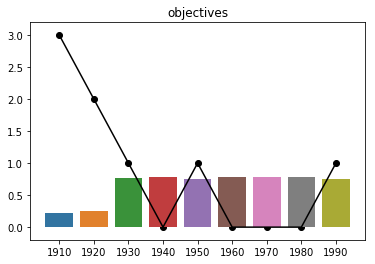

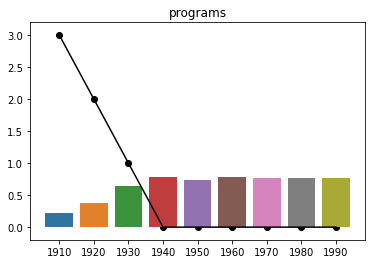

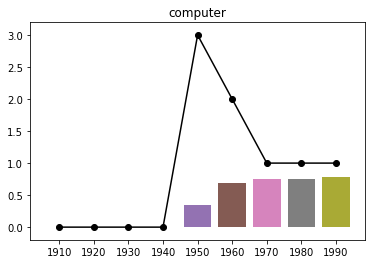

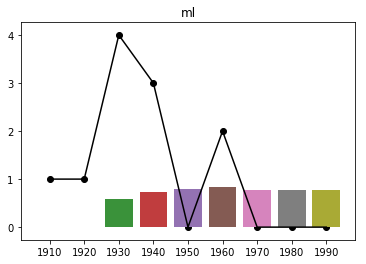

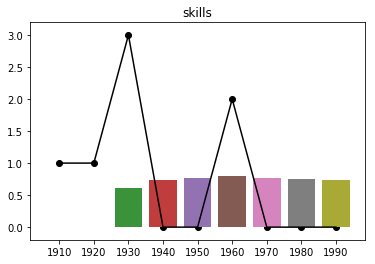

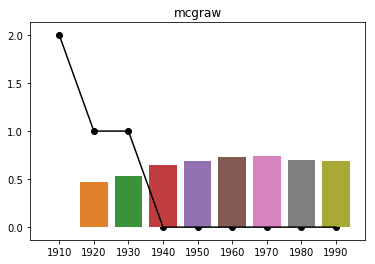

In [83]:
changepoint = []
import seaborn as sns
for word, cos_change in zip(change_words, sequential_cos):
    sns.barplot(x=np.arange(10)[1:],y=cos_change)
    plt.xticks(np.arange(9), diachronic_embeddings["d"][1:])
    clustering = MeanShift(min_bin_freq=3).fit(np.array(cos_change).reshape(-1, 1))
    plt.title(word)
    plt.plot(clustering.labels_,color='black')
    plt.scatter(x=np.arange(9),y=clustering.labels_,color='black')
    plt.show()
# NB: Uncomment to save into "figures" folder
#     plt.legend(['Cluster index from MeanShift'])
#     plt.savefig("figures/{}.png".format(word), dpi=200)
#     plt.close()